In [9]:
import numpy as np
from numpy import ma
import math
import scipy
import os
from IPython.display import Image

from netCDF4 import Dataset
import pandas as pd

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker

# from matplotlib.mlab import bivariate_normal

NA = 6.022e+23

In [10]:
# split number is 1
FILEDIR1 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/1_plume_in_60deg/Dissolving_criteria/gc_2x25_lagrange_Dissolve5'

# split number is 3
FILEDIR2 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/1_plume_in_60deg/final/gc_2x25_lagrange_final'

# split number is 5
FILEDIR3 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/1_plume_in_60deg/Dissolving_criteria/gc_2x25_lagrange_Dissolve15'


In [11]:
days = np.arange(1,32,1)

df10_life   = pd.read_fwf(FILEDIR1+'/Plume_lifetime_seconds.txt', header=None)
df10_number = pd.read_fwf(FILEDIR1+'/Plume_number.txt', header=None)

Num1_plume = df10_number.loc[:,3]
Num1_2D = df10_number.loc[:,1]
Num1_1D = df10_number.loc[:,0]
Num1_dissolved = df10_number.loc[:,2]
lifetime1 = df10_life.loc[:,1]/(3600*24)


df20_life   = pd.read_fwf(FILEDIR2+'/Plume_lifetime_seconds.txt', header=None)
df20_number = pd.read_fwf(FILEDIR2+'/Plume_number.txt', header=None)

Num2_plume = df20_number.loc[:,3]
Num2_2D = df20_number.loc[:,1]
Num2_1D = df20_number.loc[:,0]
Num2_dissolved = df20_number.loc[:,2]
lifetime2 = df20_life.loc[:,1]/(3600*24)


df30_life   = pd.read_fwf(FILEDIR3+'/Plume_lifetime_seconds.txt', header=None)
df30_number = pd.read_fwf(FILEDIR3+'/Plume_number.txt', header=None)

Num3_plume = df30_number.loc[:,3]
Num3_2D = df30_number.loc[:,1]
Num3_1D = df30_number.loc[:,0]
Num3_dissolved = df30_number.loc[:,2]
lifetime3 = df30_life.loc[:,1]/(3600*24)


16297 11743 10291


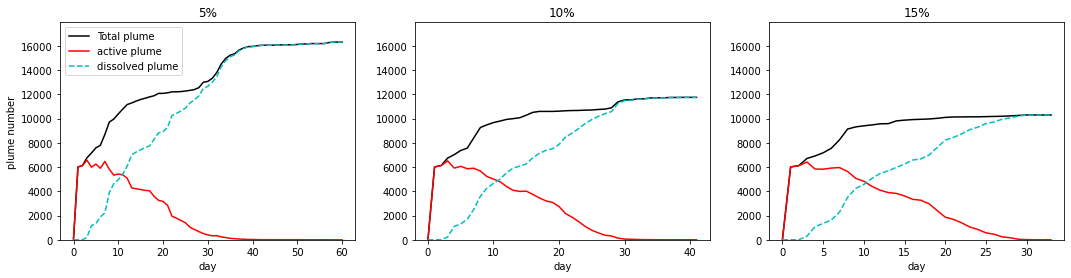

In [12]:
fig = plt.figure(figsize=(18,4));
#     gs = fig.add_gridspec(15, 8)

ax1 = plt.subplot(1,3,1);
ax1.plot(Num1_plume, 'k', label='Total plume')
ax1.plot(Num1_1D+Num1_2D, 'r', label='active plume')
ax1.plot(Num1_dissolved, 'c--', label='dissolved plume')
ax1.legend(loc='upper left')
ax1.set_title('5%')
ax1.set_xlabel('day');
ax1.set_ylabel('plume number')
ax1.set_ylim(0,max(Num1_plume)*1.1)


ax2 = plt.subplot(1,3,2);
ax2.plot(Num2_plume, 'k', label='Total plume')
ax2.plot(Num2_1D+Num2_2D, 'r', label='active plume')
ax2.plot(Num2_dissolved, 'c--', label='dissolved plume')
# ax2.legend()
ax2.set_title('10%')
ax2.set_xlabel('day');
# ax2.set_ylabel('plume number')
ax2.set_ylim(0,max(Num1_plume)*1.1)

ax3 = plt.subplot(1,3,3);
ax3.plot(Num3_plume, 'k', label='Total plume')
ax3.plot(Num3_1D+Num3_2D, 'r', label='active plume')
ax3.plot(Num3_dissolved, 'c--', label='dissolved plume')
# ax3.legend(loc='upper right')
ax3.set_title('15%')
ax3.set_xlabel('day');
# ax3.set_ylabel('plume number')
ax3.set_ylim(0,max(Num1_plume)*1.1)

# plt.title('(a) Number of plumes in different types')
plt.xlabel('day');
# plt.ylabel('number')

print(max(Num1_plume), max(Num2_plume), max(Num3_plume))

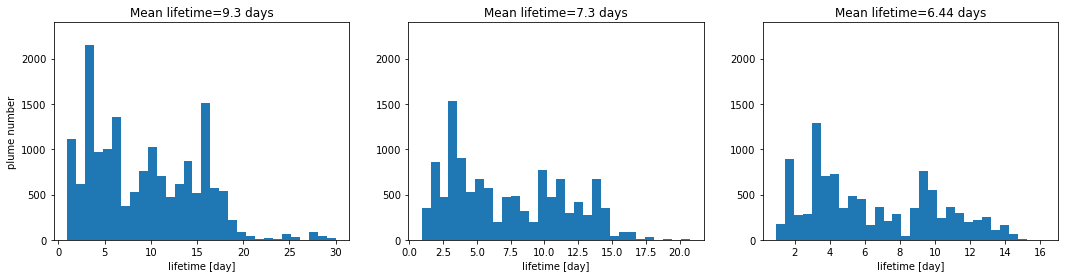

In [14]:
fig = plt.figure(figsize=(18,4));
#     gs = fig.add_gridspec(15, 8)

max_num = 2400

ax1 = plt.subplot(1,3,1);
ax1.hist(lifetime1, bins=30, label='5%')
ax1.set_ylim(0,max_num)
ax1.set_title(f'Mean lifetime={np.mean(lifetime1):0.1f} days');
ax1.set_xlabel('lifetime [day]');
ax1.set_ylabel('plume number');


ax2 = plt.subplot(1,3,2);
ax2.hist(lifetime2, bins=30, label='10%')
ax2.set_ylim(0,max_num)
ax2.set_title(f'Mean lifetime={np.mean(lifetime2):0.1f} days');
ax2.set_xlabel('lifetime [day]');
# ax2.set_ylabel('plume number');


ax3 = plt.subplot(1,3,3);
ax3.hist(lifetime3, bins=30, label='15%')
ax3.set_ylim(0,max_num)
ax3.set_title(f'Mean lifetime={np.mean(lifetime3):0.2f} days');
ax3.set_xlabel('lifetime [day]');
# ax3.set_ylabel('plume number');
